In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
try:
    os.chdir("./drive/My Drive/RuCode/RuCode3/Рекомендации Аниме")
except Exception as e:
    print(e)
#  проверяем наличие файлов
directory = os.listdir()
directory

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['anime.csv',
 'sample_submission.csv',
 'user_ratings.csv',
 'baseline_catboost.ipynb',
 'submissions',
 'sub10.csv',
 'Решения',
 'collaborative-filtering-on-anime-data.ipynb',
 'baseline_ranking_estim.ipynb',
 'sub12.csv',
 'sub13.csv',
 'sub14.csv',
 'baseline_1.51.ipynb',
 'baseline_1_47298.ipynb']

In [ ]:
import pandas as pd
import numpy as np

anime = pd.read_csv("anime.csv")
ratings = pd.read_csv("user_ratings.csv", dtype=np.int32)
sample = pd.read_csv("sample_submission.csv")

In [ ]:
sample_new = [[int(i) for i in id.split()] for id, rat in sample.values]
sample_df = pd.DataFrame(sample_new, columns=["user_id", "Id"])

In [ ]:
from collections import Counter

grouped_ratings = ratings.groupby("user_id").agg(lambda x: Counter(x).most_common(1)[0][0])\
                         .reset_index()[["user_id", "rating"]]\
                         .rename({"rating": "rating_mean"}, axis=1)

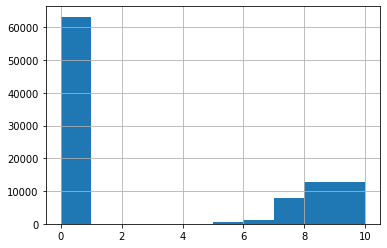

In [ ]:
grouped_ratings["rating_mean"].hist()

In [ ]:
merged = sample_df.merge(grouped_ratings, how="left", on=["user_id"])\
                         .merge(anime[["Id", "Avg score"]], how="left", on=["Id"])\
                         .replace("Unknown", np.nan)

In [ ]:
median_value = merged["Avg score"].median()
merged["Avg score"] = merged["Avg score"].fillna(median_value).astype(np.float32)

In [ ]:
merged["rating"] = (merged["rating_mean"] + merged["Avg score"]) / 2

In [ ]:
merged.head()

,user_id,Id,rating_mean,Avg score,rating
0,0,249,8,7.85,7.925
1,0,4181,8,8.96,8.480
2,0,813,8,8.16,8.080
3,0,2167,8,8.07,8.035
4,1,1838,7,5.98,6.490


In [ ]:
merged.loc[merged["rating_mean"] < merged["Avg score"]].head(3)

,user_id,Id,rating_mean,Avg score,rating
1,0,4181,8,8.96,8.480
2,0,813,8,8.16,8.080
3,0,2167,8,8.07,8.035


In [ ]:
arr = []
n = 0
for element in merged.values:
    rat = element[2]
    avg = element[3]
    if not rat:
        element[4] = avg
        n += 1
    arr.append(element)
merged_checked = pd.DataFrame(arr, columns=['user_id', 'Id', 'rating_mean',
                                            'Avg score', 'rating'])
merged_checked["user_id"] = merged_checked["user_id"].astype(np.int32)
merged_checked["Id"] = merged_checked["Id"].astype(np.int32)
print(n)

556160


In [ ]:
merged_checked.head()

,user_id,Id,rating_mean,Avg score,rating
0,0,249,8.0,7.85,7.925
1,0,4181,8.0,8.96,8.480
2,0,813,8.0,8.16,8.080
3,0,2167,8.0,8.07,8.035
4,1,1838,7.0,5.98,6.490


In [ ]:
merged_checked["rating"].mean()

7.813438264615688

In [ ]:
merged["rating"].mean()

5.353589057922363

In [ ]:
df_out = pd.DataFrame()
df_out["Id"] = merged_checked["user_id"].astype(str) + " " + merged_checked["Id"].astype(str)
df_out["rating"] = merged_checked["rating"]

In [ ]:
df_out.head(3)

,Id,rating
0,0 249,7.925
1,0 4181,8.480
2,0 813,8.080


In [ ]:
df_out.to_csv("sub15.csv", index=False)

In [ ]:
df_out["rating"].mean()

7.813438264615688

In [ ]:
df_out["rating"].isna().sum()

0

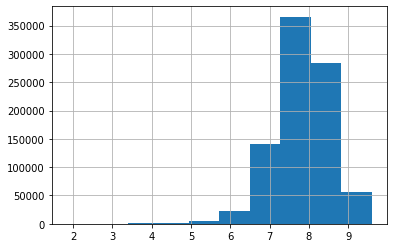

In [ ]:
df_out["rating"].hist()